In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/home/Tekhta/TableEDD')

import torch
from torch import nn
from torch.utils.data import DataLoader

from table_parser import TableEDD
from data.pubtabnet import PubTabNet

# TEST  MODEL

In [7]:
a = torch.rand(1, 3, 256, 256)
model = TableEDD(
    hidden_size=256,
    elem_num=30,
    max_elem_length=1000, 
    pretrained=False)
struct_pred, loc_pred = model(a)

In [8]:
print(struct_pred.shape)
print(loc_pred.shape)

torch.Size([1, 1000, 30])
torch.Size([1, 1000, 4])


# TEST DATALOADER

In [1]:
import sys
sys.path.append('/home/Tekhta/TableEDD')

import torch
from torch import nn
from torch.utils.data import DataLoader

from table_parser import TableEDD
from data.pubtabnet import PubTabNet

In [2]:
BATCH_SIZE = 8

ptn_dataset = PubTabNet(
    '/home/Tekhta/PaddleOCR/data/pubtabnet/PubTabNet_val_span.jsonl',
    '/home/Tekhta/PaddleOCR/data/pubtabnet/val/',
    elem_dict_path='/home/Tekhta/TableEDD/utils/dict/table_elements.txt'
)

In [3]:
%%time
dataloader = DataLoader(ptn_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_image, (train_struct, train_bbox) = next(iter(dataloader))

(454, 486, 3)
(3, 512, 512)

(137, 278, 3)
(3, 512, 512)

(444, 503, 3)
(3, 512, 512)

(105, 251, 3)
(3, 512, 512)

(119, 502, 3)
(3, 512, 512)

(365, 486, 3)
(3, 512, 512)

(235, 238, 3)
(3, 512, 512)

(92, 502, 3)
(3, 512, 512)

CPU times: user 2.59 s, sys: 54.9 ms, total: 2.65 s
Wall time: 1.13 s


TypeError: Invalid shape (3, 512, 512) for image data

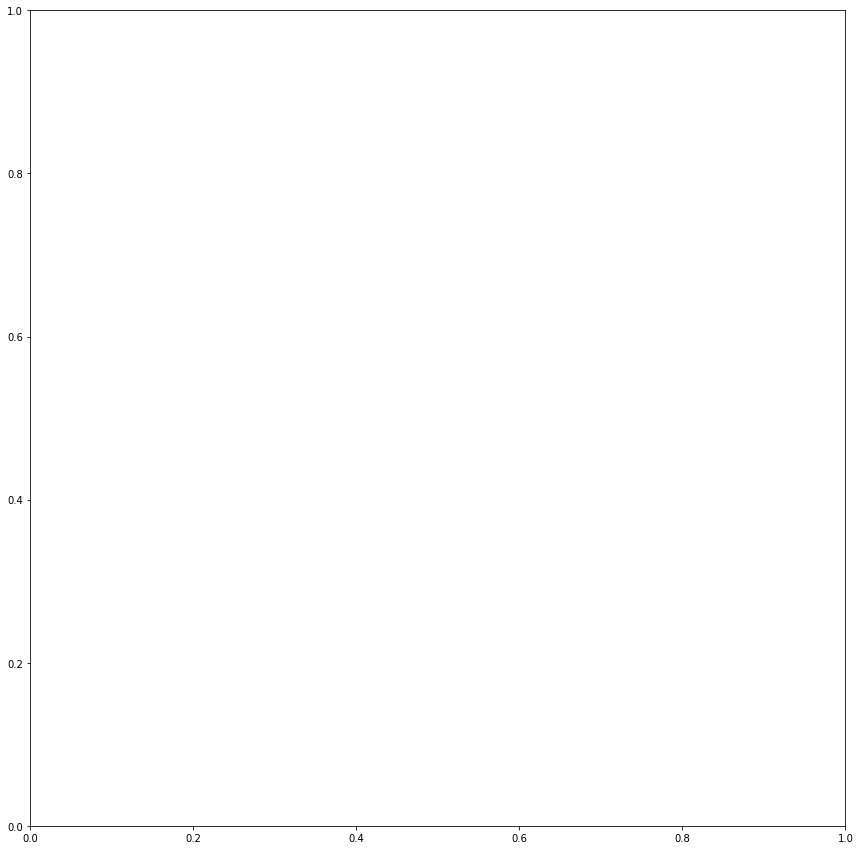

In [4]:
import matplotlib.pyplot as plt

for idx in range(BATCH_SIZE):
    tmp_img = train_image[idx].numpy()
    tmp_bbox = train_bbox[idx].numpy()

    h, w = tmp_img.shape[:2]

    plt.figure(figsize=(15,15))
    plt.imshow(tmp_img)
    for bbox in tmp_bbox:
        x0, y0, x1, y1 = bbox
        plt.plot((x0, x1, x1, x0, x0), (y0, y0, y1, y1, y0), color='red')

    plt.show()

In [5]:
model = TableEDD(
    hidden_size=256,
    elem_num=30,
    max_elem_length=1000, 
    pretrained=False)

In [6]:
train_image.shape

torch.Size([8, 3, 512, 512])

In [7]:
pred_struct, pred_bbox = model(train_image)

RuntimeError: expected scalar type Byte but found Float

In [7]:
print(train_image.shape)
print(train_struct.shape)
print(train_bbox.shape)

torch.Size([64, 512, 512, 3])
torch.Size([64, 1000, 30])
torch.Size([64, 1000, 4])
